In [14]:
import gzip
import os
import pathlib

import matplotlib.pyplot as plt

In [56]:
train_chan_arrays = parse_eeg_dataset(eeg_root_train)

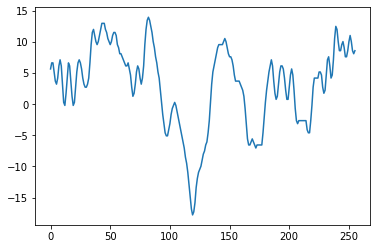

In [61]:
plt.plot(train_dataset[0])

In [65]:
import pickle

In [66]:
 with open('data/mimic.p', 'rb') as f:
        MIMIC_data = pickle.load(f)

In [69]:
MIMIC_data.keys()

dict_keys(['longitudinal', 'static', 'trajectory_lengths'])

In [72]:
MIMIC_data['longitudinal'].shape

(5833, 50, 28)

In [73]:
feature_names = ['temphigh', 'heartratehigh', 'sysbplow', 'diasbplow',
                     'meanbplow', 'spo2high',
                     'fio2high', 'respratelow', 'glucoselow', 'bicarbonatehigh',
                     'bicarbonatelow', 'creatininehigh', 'creatininelow',
                     'hematocrithigh',
                     'hematocritlow', 'hemoglobinhigh', 'hemoglobinlow',
                     'platelethigh',
                     'plateletlow', 'potassiumlow', 'potassiumhigh', 'bunhigh',
                     'bunlow',
                     'wbchigh', 'wbclow', 'antibiotics', 'norepinephrine',
                     'mechanical_ventilator'
                     'age', 'weight']
print(len(feature_names))

29


In [82]:
import numpy as np

In [83]:
np.mean(MIMIC_data['trajectory_lengths'])

8.833704783130464

In [75]:
from utils.mimic_data_processing import process_MIMIC_data

In [76]:
X_, Y_, T_, L, feature_names = process_MIMIC_data()

In [80]:
X_[0]

array([[ 2.29027669,  3.39571048,  1.92084313,  2.6162321 ,  2.2673646 ,
         2.17745592,  3.66632584,  2.47124705,  2.84493661,  1.29015477,
         1.34930826,  0.84917877,  0.68311168,  2.5399749 ,  2.60647107,
         2.32860357,  2.38804373,  3.09512095,  2.51720403,  1.62505779,
         1.89167086,  0.65755071,  0.65755071,  2.5860554 ,  1.47692368,
         2.99880056, -0.16873673,  3.21954908, -1.3826081 , -0.6230196 ],
       [ 2.18153977,  2.90542233,  2.42766821,  3.52976298,  3.10341544,
         2.17745592,  1.20923978,  1.50184637,  2.73616352,  1.4837812 ,
         1.5493241 ,  0.73224078,  0.80875161,  1.86642466,  1.81626312,
         1.67805891,  1.71742073,  1.60223584,  1.42807254,  2.49873577,
         2.26251961,  0.95483518,  0.95483518,  0.84125116,  0.64923541,
         2.99880056, -0.16873673,  3.21954908, -1.3826081 , -0.6230196 ],
       [ 2.14658861,  2.41513418,  2.66774324,  4.06713409,  3.60504595,
         2.17745592,  1.20923978,  0.97308237,  2

In [81]:
Y_[0]

array([ 7. ,  6.5, 21. , 21. ])

In [85]:
MIMIC_data['static'].shape

(5833, 2)

In [87]:
feature_names[25]

'antibiotics'

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
feature_names = ['temphigh', 'heartratehigh', 'sysbplow', 'diasbplow',
                     'meanbplow', 'spo2high',
                     'fio2high', 'respratelow', 'glucoselow', 'bicarbonatehigh',
                     'bicarbonatelow', 'creatininehigh', 'creatininelow',
                     'hematocrithigh',
                     'hematocritlow', 'hemoglobinhigh', 'hemoglobinlow',
                     'platelethigh',
                     'plateletlow', 'potassiumlow', 'potassiumhigh', 'bunhigh',
                     'bunlow',
                     'wbchigh', 'wbclow', 'antibiotics', 'norepinephrine',
                     'mechanical_ventilator'
                     'age', 'weight']

with open('data/mimic.p', 'rb') as f:
    MIMIC_data = pickle.load(f)

XX = MIMIC_data["longitudinal"][:, :, :]
static = np.repeat(MIMIC_data['static'].reshape((-1, 1, 2)), XX.shape[1],
                   axis=1)  # append age and weight features

X = np.concatenate((XX, static), axis=2)  # MIMIC_data["longitudinal"][:,
# :, :] #list(set(list(range(28))) - set([23, 24, 25]))]
Y = MIMIC_data["longitudinal"][:, :, 23]  # 'wbchigh'
T = MIMIC_data["longitudinal"][:, :, 25]  # 'antibiotics'
L = MIMIC_data['trajectory_lengths']

scaler = StandardScaler()
X_unrolled = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
X_unrolled = scaler.fit_transform(X_unrolled)
X_rerolled = X_unrolled.reshape((X.shape[0], X.shape[1], X.shape[2]))
X_ = [X_rerolled[k, :L[k] - 1, :] for k in range(X_rerolled.shape[0])]
Y_ = [Y[k, 1:L[k]] for k in range(Y.shape[0])]
T_ = [T[k, :L[k]] for k in range(T.shape[0])]

In [92]:
Y[0]

array([17. ,  7. ,  6.5, 21. , 21. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [93]:
L[0]

5

In [114]:
Y_[1]

array([15.1, 17. , 15.9, 12. ])

In [97]:
X[0][23].shape

(30,)

In [112]:
len(np.where(L>4)[0])

4323

In [110]:
X_[0][:, 23]

array([2.5860554 , 0.84125116, 0.75401095, 3.2839771 ])

4323 patients with 5+ observed values; use small horizon of 2 values
* split patients into training/calibration/test groups: 2800/1823/500 or 3823/500

In [119]:
X[0][:, 23]

array([17. ,  7. ,  6.5, 21. , 21. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [113]:
4323 - 500

3823

In [115]:
X.shape

(5833, 50, 30)

In [117]:
Y_[0]

array([ 7. ,  6.5, 21. , 21. ])

In [118]:
Y[0]

array([17. ,  7. ,  6.5, 21. , 21. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [121]:
feature_names.index('wbchigh')

23

In [128]:
horizon=2
a = []
b = []
for k in np.where(L > 5)[0]:
    a.append(Y[k, :L[k]-horizon])
    b.append(Y[k, L[k]-horizon:L[k]])

In [133]:
A.max()

302.5

In [135]:
B.max()

13.5

array([13.4,  8.5])

In [141]:
Y

array([[17. ,  7. ,  6.5, ...,  0. ,  0. ,  0. ],
       [15.8, 15.1, 17. , ...,  0. ,  0. ,  0. ],
       [ 9.9, 10.7,  9.2, ...,  0. ,  0. ,  0. ],
       ...,
       [15.4, 11.1,  9.6, ...,  0. ,  0. ,  0. ],
       [ 9. ,  7.5,  7.1, ...,  0. ,  0. ,  0. ],
       [95.4, 84.4, 74.2, ...,  0. ,  0. ,  0. ]])

In [142]:
scaler = StandardScaler()

In [138]:
Y_scaled = scaler.fit_transform(Y)

In [139]:
Y_scaled

array([[ 0.29103029, -0.73859044, -0.70754806, ..., -0.01803265,
        -0.01309457,  0.        ],
       [ 0.17082964,  0.31550957,  0.68262512, ..., -0.01803265,
        -0.01309457,  0.        ],
       [-0.42015693, -0.25708797, -0.35007495, ..., -0.01803265,
        -0.01309457,  0.        ],
       ...,
       [ 0.13076275, -0.20503365, -0.29711598, ..., -0.01803265,
        -0.01309457,  0.        ],
       [-0.51030743, -0.67352254, -0.62810959, ..., -0.01803265,
        -0.01309457,  0.        ],
       [ 8.14413997,  9.33392073,  8.255759  , ..., -0.01803265,
        -0.01309457,  0.        ]])

In [150]:
%load_ext autoreload
%autoreload 2

In [151]:
from utils.mimic_data_processing import split_MIMIC_data

ImportError: cannot import name 'split_MIMIC_data' from 'utils.mimic_data_processing' (/Users/kamilestankeviciute/Documents/Oxford/dissertation/conformal-rnn/utils/mimic_data_processing.py)